#### Objective: Raster Data Analysis

In [1]:
# pip install rasterio

In [2]:
# pip install numpy

##### Step 1: Import necessary packages

In [3]:
# import necessary file
import rasterio as ro
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

##### Step 2: Read the raster dat using rasterio metadata functions

In [4]:
pre_dsm = ro.open(r'data/2_rasterAnalysis/pre_DSM.tif')
pre_dtm = ro.open(r'data/2_rasterAnalysis/pre_DTM.tif')

print("No of bands in pre_DSM.tif: ", pre_dsm.count)
print("No of bands in pre_DTM.tif: ", pre_dtm.count)

No of bands in pre_DSM.tif:  1
No of bands in pre_DTM.tif:  1


In [5]:
# The dimensions of the two raster data
print("Dimension of pre_DSM: ",[pre_dsm.width, pre_dsm.height])
print("Dimension of pre_DTM: ",[pre_dtm.width, pre_dtm.height])

Dimension of pre_DSM:  [4000, 2000]
Dimension of pre_DTM:  [4000, 2000]


##### Step 3: Plot both rasters with their default visualization

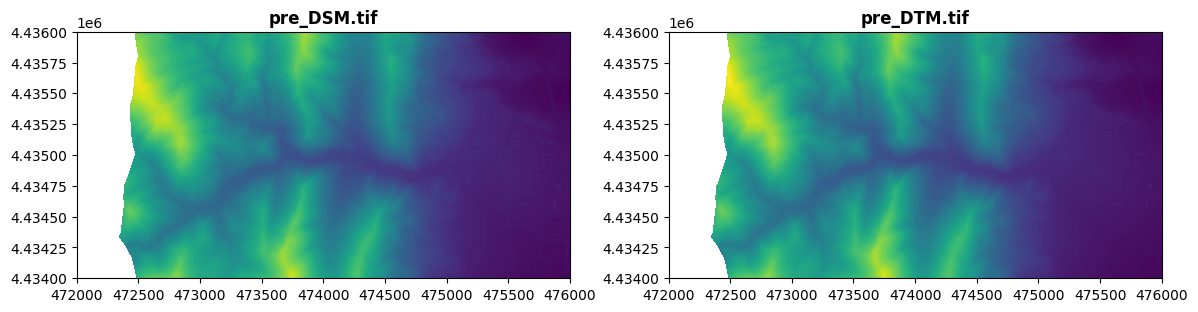

In [6]:
fig, (axa, axb) = plt.subplots(1,2, figsize=(14,7))
show(pre_dsm, ax=axa, title='pre_DSM.tif')
show(pre_dtm, ax=axb, title='pre_DTM.tif')
plt.show()

##### Step 4: Inferring our raster

###### Each pixel value represents ground elevation. 
To find the minimum height and maximum height in it

In [7]:
dtm_data = pre_dtm.read(1,masked=True)
dsm_data = pre_dsm.read(1,masked=True)
heights = dsm_data - dtm_data 
heights.max()
print("Max and Min heights after taking the difference of DSM and DTM layers: ", (heights.max(), heights.min()))

Max and Min heights after taking the difference of DSM and DTM layers:  (26.930054, 0.0)


###### Plot a histogram of heights with the specified bin range

Text(0, 0.5, 'Frequency')

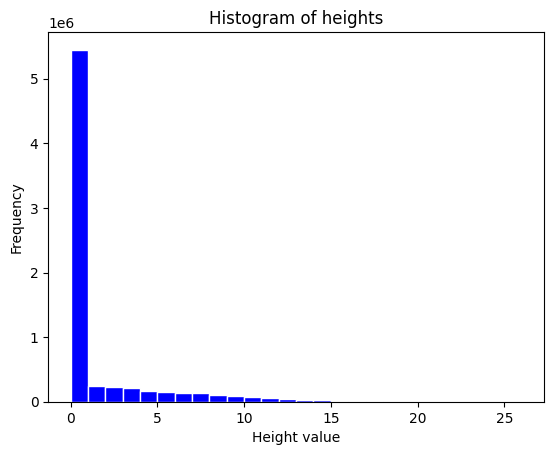

In [8]:
plt.hist(heights.ravel(), bins=range(0,27,1), color='blue', edgecolor='white')
plt.title('Histogram of heights')
plt.xlabel('Height value')
plt.ylabel('Frequency')

##### Step 5: Reclassifying the raster ans save it

###### Reclassify the raster using the np.digitize function.

In [9]:
bins = np.array([0.0, 2.0, 7.0, 12.0])
heights_reclassify = np.digitize(heights, bins, right=True)

###### Save the reclassified raster as a tiff file to the disk

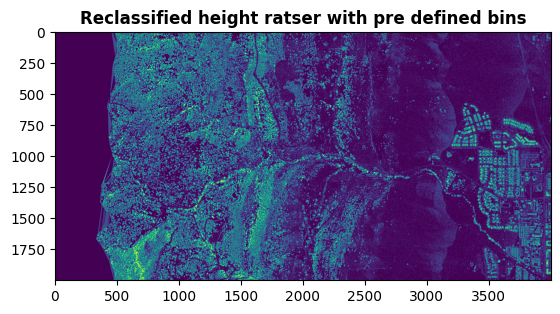

<Axes: title={'center': 'Reclassified height ratser with pre defined bins'}>

In [10]:
show(heights_reclassify, title='Reclassified height ratser with pre defined bins')

In [11]:
new_dataset = ro.open("data/2_rasterAnalysis/new_dataset1.tif","w",
                      driver="GTiff", 
                      width = pre_dsm.width,
                      height = pre_dsm.height,
                      count = 1, 
                      dtype = dsm_data.dtype, 
                      crs = pre_dsm.crs, 
                      transform = pre_dsm.transform)

In [12]:
new_dataset.write(heights_reclassify,1)
new_dataset.close()

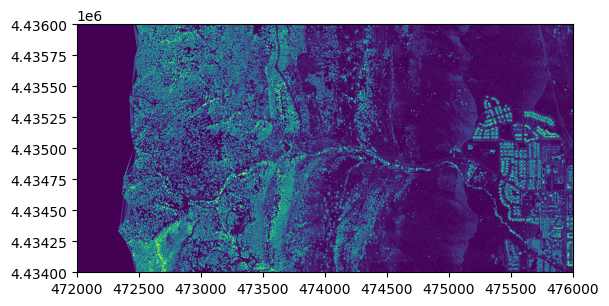

<Axes: >

In [13]:
x = ro.open("data/2_rasterAnalysis/new_dataset1.tif")
show(x)